In [120]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable

In [91]:
def f(x):
    return 1 / 2 * x ** 3 - 6 * x ** 2 - 18 * x + 1

In [121]:
def dichotomy_method(a: float, b: float, epsilon: float, f: Callable):
    """
    Метод дихотомии для нахождения минимума
    :param a: левая граница отрезка, на котором нужно искать минимум
    :param b: правая граница отрезка, на котором нужно искать минимум
    :param epsilon: требуемая точность поиска
    :param f: заданная функция
    :return: x_star - найденный минимум, iterations - найденные минимумы по итерациям, length - длины интервалов неопределенности по итерациям
    """
    iterations = []
    lengths = []

    while b - a > 2 * epsilon:
        y = (a + b - epsilon) / 2
        z = (a + b + epsilon) / 2

        if f(y) <= f(z):
            b = z
        else:
            a = y

        iterations.append((a + b) / 2)
        lengths.append(b - a)

    x_star = (a + b) / 2
    return x_star, iterations, lengths

In [122]:
def golden_section_method(l: float, r: float, epsilon: float, f: Callable):
    """
    Метод золотого сечения для нахождения минимума
    :param l: левая граница отрезка, на котором нужно искать минимум
    :param r: правая граница отрезка, на котором нужно искать минимум
    :param epsilon: требуемая точность поиска
    :param f: заданная функция
    :return: x_star - найденный минимум, iterations - найденные минимумы по итерациям, length - длины интервалов неопределенности по итерациям
    """
    iterations = []
    lengths = []

    phi = (1 + np.sqrt(5)) / 2
    resphi = 2 - phi

    x_1 = l + resphi * (r - l)
    x_2 = r - resphi * (r - l)
    f_1 = f(x_1)
    f_2 = f(x_2)

    while np.abs(r - l) > epsilon:
        if f_1 < f_2:
            r = x_2
            x_2 = x_1
            f_2 = f_1
            x_1 = l + resphi * (r - l)
            f_1 = f(x_1)
        else:
            l = x_1
            x_1 = x_2
            f_1 = f_2
            x_2 = r - resphi * (r - l)
            f_2 = f(x_2)

        iterations.append((l + r) / 2)
        lengths.append(np.abs(r - l))

    return (r + l) / 2, iterations, lengths

In [125]:
def get_results(a: float, b: float, f: Callable, epsilon: float):
    """
    Получение результатов работы алгоритмов в читаемом формате
    :param a: левая граница интервала неопределенности
    :param b: правая граница интервала неопределенности
    :param f: заданная функция
    :param epsilon: требуемая точность
    """
    x_dichotomy, iterations_dichotomy, lengths_dichotomy = dichotomy_method(a, b, epsilon, f)
    x_golden_section, iterations_golden_section, lengths_golden_section = golden_section_method(a, b, epsilon, f)
    x = np.linspace(a, b, 10000)
    y = [f(i) for i in x]

    plt.figure(figsize=(14, 7))
    plt.subplot(1, 2, 1)
    plt.plot(x, y, label="f(x)")
    plt.scatter(iterations_dichotomy, [f(i) for i in iterations_dichotomy], color="red", label="Iterations")
    plt.title("Метод дихотомии")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(x, y, label="f(x)")
    plt.scatter(iterations_golden_section, [f(i) for i in iterations_golden_section], color="blue", label="Iterations")
    plt.title("Метод золотого сечения")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14, 5))
    plt.plot(range(len(lengths_dichotomy)), lengths_dichotomy, label="Дихотомия", marker="o")
    plt.plot(range(len(lengths_golden_section)), lengths_golden_section, label="Золотое сечение", marker="s")
    plt.title("Изменение длины интервала неопределенности")
    plt.xlabel("Итерация")
    plt.ylabel("Длина интервала")
    plt.legend()
    plt.grid()
    plt.show()

    print("Метод дихотомии:")
    print(f"Минимум функции: x* ≈ {x_dichotomy:.5f}, f(x*) ≈ {f(x_dichotomy):.5f}")
    print(f"Количество итераций: {len(iterations_dichotomy)}")

    print("\nМетод золотого сечения:")
    print(f"Минимум функции: x* ≈ {x_golden_section:.5f}, f(x*) ≈ {f(x_golden_section):.5f}")
    print(f"Количество итераций: {len(iterations_golden_section)}")

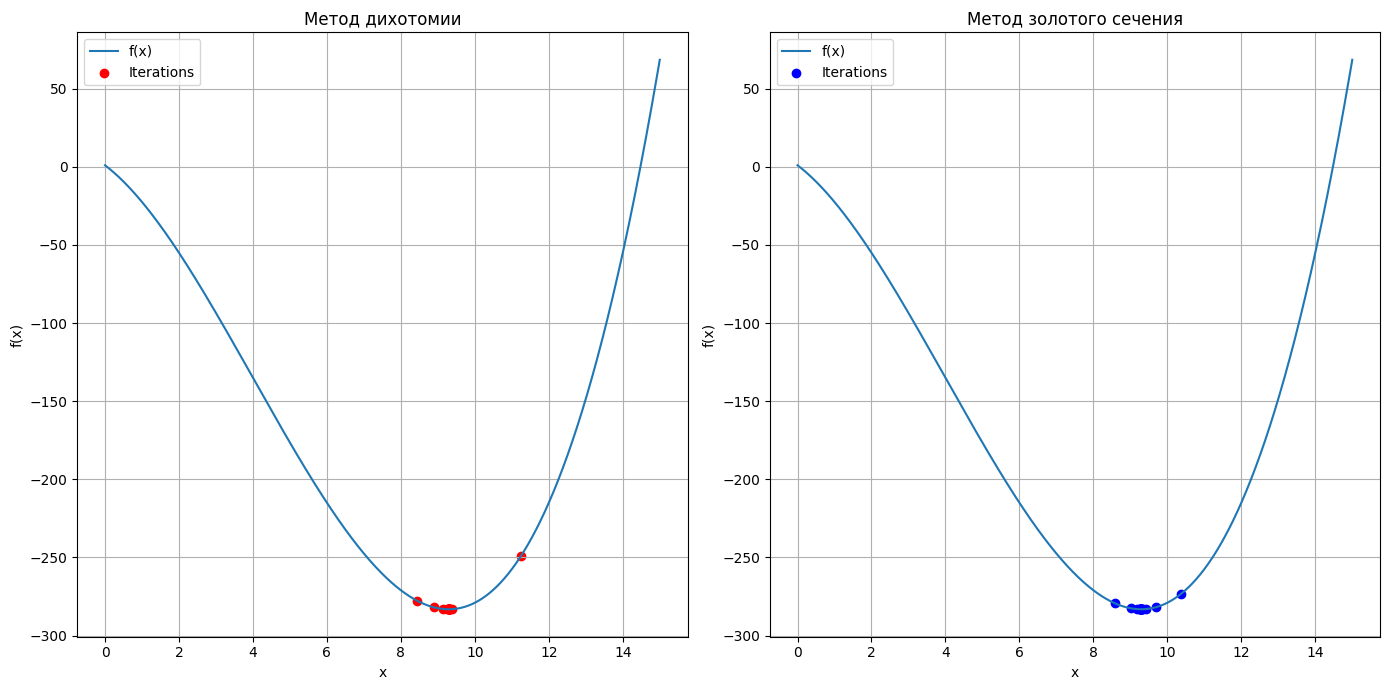

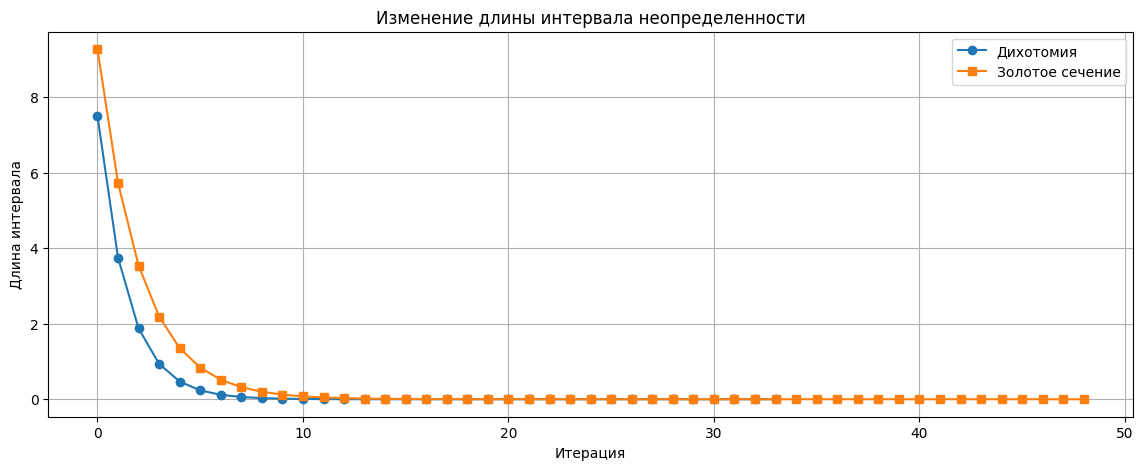

Метод дихотомии:
Минимум функции: x* ≈ 9.29150, f(x*) ≈ -283.16207
Количество итераций: 34

Метод золотого сечения:
Минимум функции: x* ≈ 9.29150, f(x*) ≈ -283.16207
Количество итераций: 49


In [124]:
get_results(0, 15, f, 1e-9)

## Другая функция

In [103]:
def g(x):
    if x < -3:
        return (x - 9) ** 2 + 2
    elif -3 <= x < 0:
        return 145 / 3 * abs(x) + 1
    elif 0 <= x <= 3:
        return abs(x) + 1
    else:
        return (x - 2) ** 2 + 5

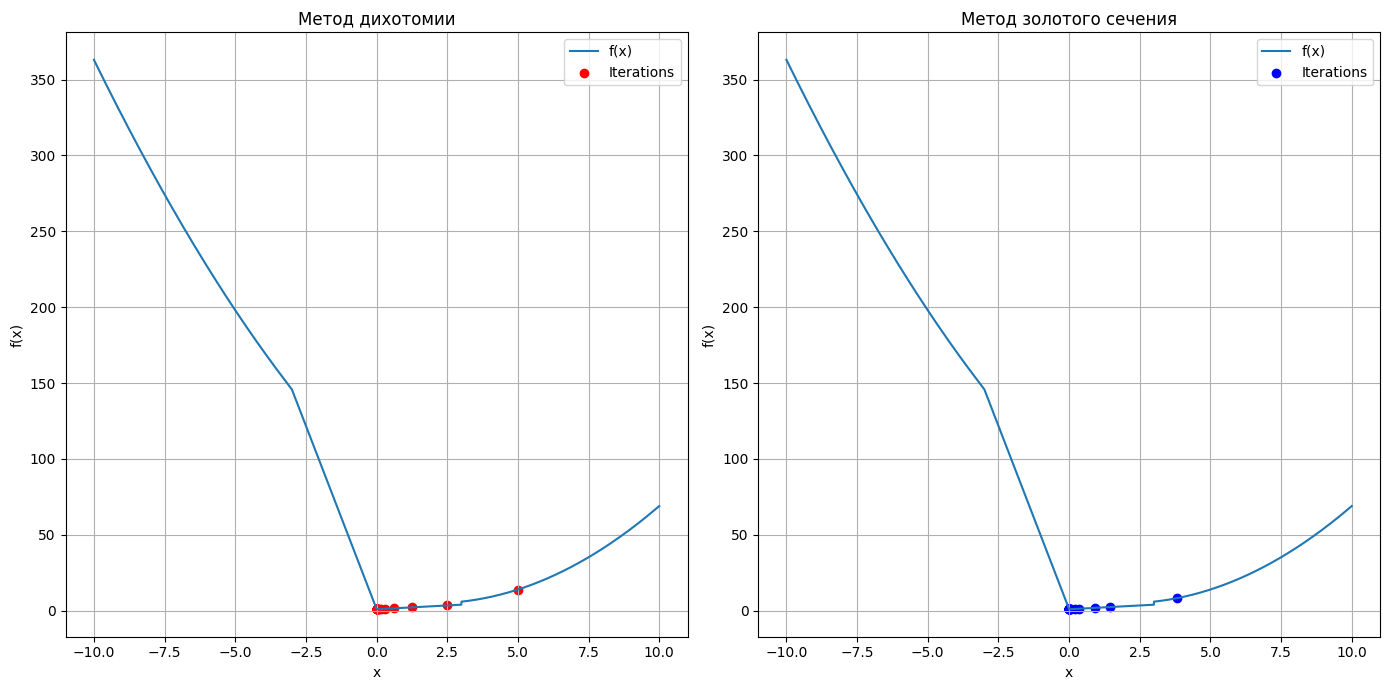

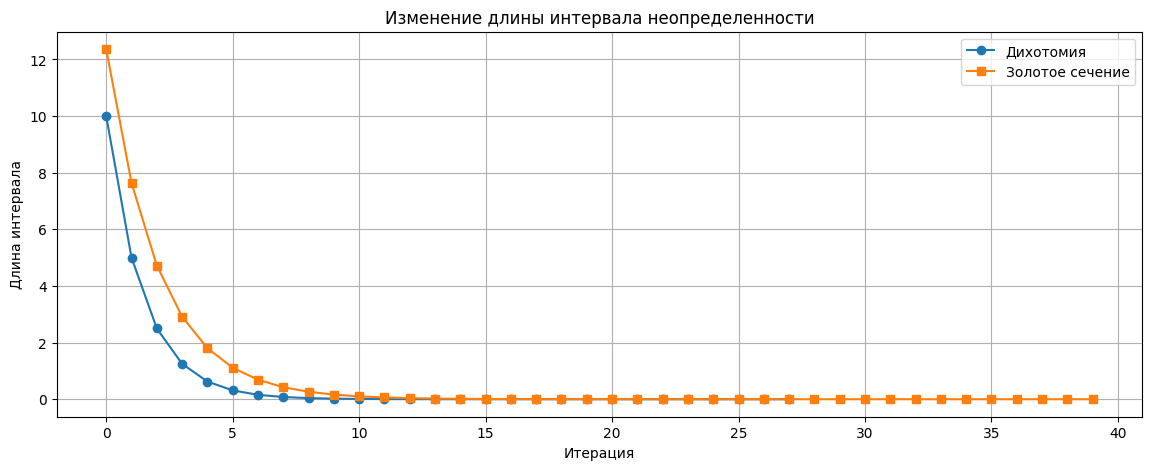

Метод дихотомии:
Минимум функции: x* ≈ 0.00000, f(x*) ≈ 1.00000
Количество итераций: 28

Метод золотого сечения:
Минимум функции: x* ≈ 0.00000, f(x*) ≈ 1.00000
Количество итераций: 40


In [119]:
get_results(-10, 10, g, 1e-7)

## Случай, когда не унимодальная функция

In [138]:
def k(x):
    return x ** 4 + 9 * x ** 3 - 10 * x + 5

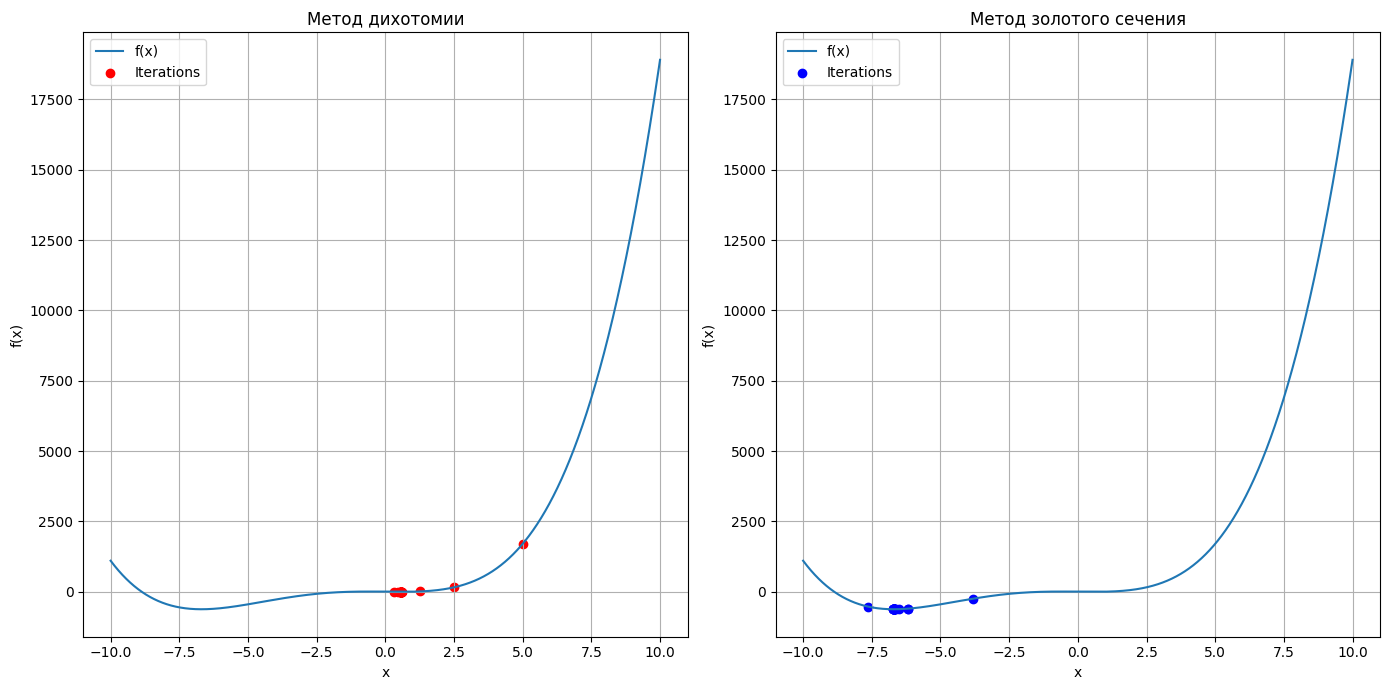

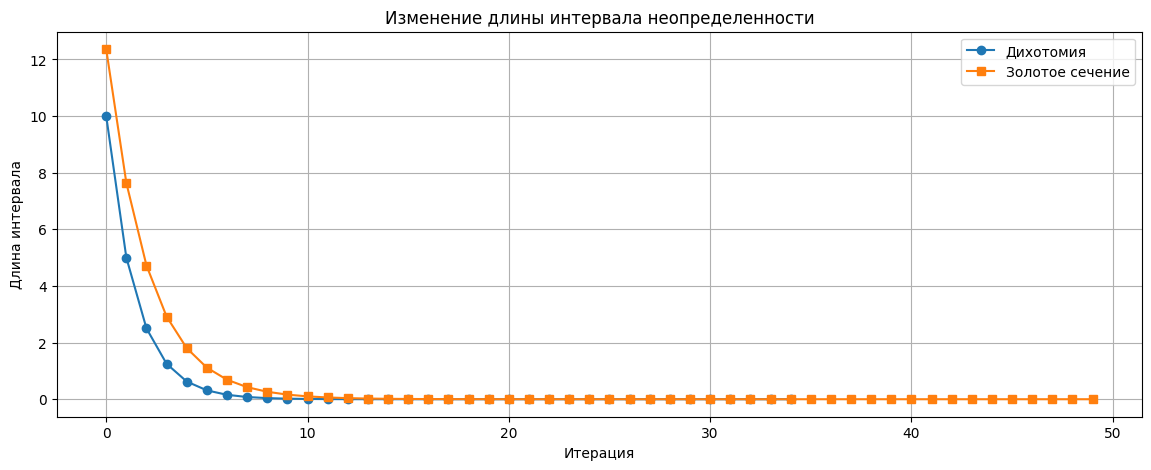

Метод дихотомии:
Минимум функции: x* ≈ 0.58385, f(x*) ≈ 1.06891
Количество итераций: 35

Метод золотого сечения:
Минимум функции: x* ≈ -6.69421, f(x*) ≈ -619.75786
Количество итераций: 50


In [139]:
get_results(-10, 10, k, 1e-9)